In [1]:
import numpy as np
from matplotlib import pyplot as plt
plt.style.use('../styles_and_utils/graphstyle.mplstyle')

import sys
sys.path.insert(1, '../')
from styles_and_utils import *

In [2]:
# pandas
import pandas as pd
def df2np(df, model):
    df = df.loc[df['Model'] == model, 'SSIM']
    return df.to_numpy().T

# Load Knee results
knee_df = pd.read_excel('./data/knee_results.xlsx')

knee_unt_124M = df2np(knee_df, 'U-Net-124M')
knee_pt_unt_124M = df2np(knee_df, 'PT-U-Net-124M')

knee_vit_060M = df2np(knee_df, 'ViT-60M/10')
knee_pt_vit_060M = df2np(knee_df, 'PT-ViT-60M/10')





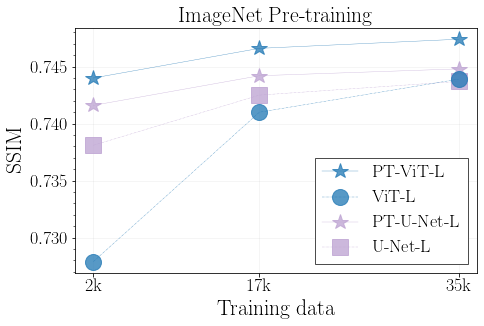

In [3]:
w, h = plt.rcParams["figure.figsize"]
fig, ax = plt.subplots()

""" Model styles """
vits = ViT('s')
vitm = ViT('m')
vitl = ViT('l')

unts = Unet('s')
untm = Unet('m')
untl = Unet('l')

""" Plot knee """
knee_train_data = [2, 17, 35]
ax.plot(knee_train_data, knee_pt_vit_060M, '*-', markersize=vitl.ms, alpha=vitl.oc, color=vitl.color, label='PT-'+vitl.label, zorder=6)
ax.plot(knee_train_data, knee_vit_060M, vitl.marker, markersize=vitl.ms, alpha=vitl.oc, color=vitl.color, label=vitl.label, zorder=5)
ax.plot(knee_train_data, knee_pt_unt_124M, '*-', markersize=untl.ms, alpha=vitl.oc, color=untl.color, label='PT-'+untl.label, zorder=4)
ax.plot(knee_train_data, knee_unt_124M, untl.marker, markersize=untl.ms, alpha=untl.oc, color=untl.color, label=untl.label, zorder=3)

ax.set_title('ImageNet Pre-training')
ax.set_xticks(knee_train_data)
ax.set_xticklabels(['2k', '17k', '35k'])
ax.tick_params(axis='x', which='minor', bottom=False)
# ax.yaxis.set_ticks(np.arange(0.725, 0.745, 0.005))
ax.legend()

# Labels
ax.set_xlabel('Training data')
ax.set_ylabel('SSIM')

## Save
fig.savefig('./plots/pretrained.pdf', format="pdf", bbox_inches = 'tight')